<a href="https://colab.research.google.com/github/pswami12/DataScienceFiles/blob/main/Class_7_3rd_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

In [2]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.utils import np_utils

from tensorflow.keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


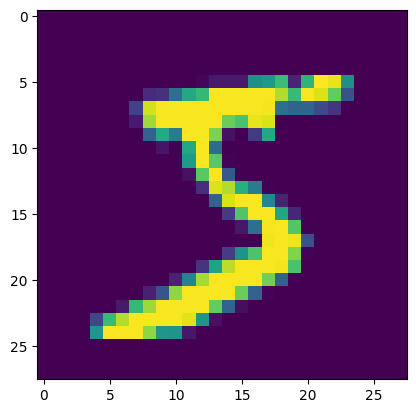

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [8]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
model = Sequential()


model.add(Convolution2D(10, kernel_size = 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, kernel_size = 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(32, kernel_size = 3, activation='relu')) # 22
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, kernel_size = 1, activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(16, kernel_size = 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(32, kernel_size = 3, activation='relu')) # 7
model.add(BatchNormalization())

model.add(Convolution2D(10, kernel_size = 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, kernel_size = 7))
model.add(Flatten())
model.add(Activation('softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 10)       40        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        1456      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 batch_normalization_2 (Batc  (None, 22, 22, 32)       1

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32,
          epochs=20, verbose=1,
          validation_data=(X_test, Y_test), )

Epoch 1/20
1875/1875 [==============================] - 29s 8ms/step - loss: 0.1292 - accuracy: 0.9605 - val_loss: 0.0601 - val_accuracy: 0.9802
Epoch 2/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0447 - accuracy: 0.9859 - val_loss: 0.0474 - val_accuracy: 0.9847
Epoch 3/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0365 - accuracy: 0.9887 - val_loss: 0.0340 - val_accuracy: 0.9888
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0281 - accuracy: 0.9910 - val_loss: 0.0323 - val_accuracy: 0.9898
Epoch 5/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0238 - accuracy: 0.9922 - val_loss: 0.0341 - val_accuracy: 0.9891
Epoch 6/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0217 - accuracy: 0.9934 - val_loss: 0.0289 - val_accuracy: 0.9915
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0203 - accuracy: 0.9935 - val_loss: 0.0326 - val_ac

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.040785156190395355, 0.9901999831199646]
